<class 'numpy.ndarray'>
0.9920801322508517


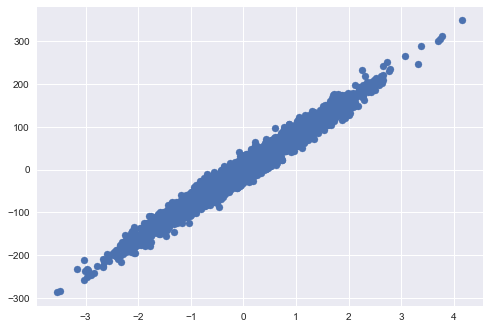

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot


# 1.Data preparation
X = pd.read_csv("./Training Data (2)/Linear_X_Train.csv")
y = pd.read_csv("./Training Data (2)/Linear_Y_Train.csv")

X = X.values
y = y.values
print(type(y))

u = X.mean()
std = X.std()
X = (X-u)/std



plot.style.use('seaborn')
plot.scatter( X,y)
plot.show()




In [45]:
def hypothesis(x,theta):
    y_ = theta[0] + x*theta[1]
    return y_

def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += ( y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i] , theta)
        total_error += (y_ - Y[i])**2 
        
    return total_error/m

def gradientDescent( X,Y ,max_steps= 50, learning_rate = 0.1):
        error_list = []
        theta = np.zeros( (2,))
        
        for i in range( max_steps):
            grad = gradient(X,Y,theta)
            e = error(X,Y,theta)
            error_list.append(e)
            
            theta[0] = theta[0] - learning_rate*grad[0]
            theta[1] = theta[1] - learning_rate*grad[1]
            
            
        return theta , error_list
    
    
    

In [49]:
theta, error_list = gradientDescent(X,y)

In [40]:
theta


array([0.6838508 , 7.88584062])

In [31]:
error_list

[array([0.07819954]),
 array([0.00025191]),
 array([0.01854808]),
 array([0.00388291]),
 array([0.01006585]),
 array([0.00670092]),
 array([0.00834721]),
 array([0.00752481]),
 array([0.00794267]),
 array([0.00773825]),
 array([0.0078431]),
 array([0.00779207]),
 array([0.00781831]),
 array([0.00780556]),
 array([0.00781212]),
 array([0.00780893]),
 array([0.00781057]),
 array([0.00780977]),
 array([0.00781018]),
 array([0.00780998]),
 array([0.00781009]),
 array([0.00781004]),
 array([0.00781006]),
 array([0.00781005]),
 array([0.00781006]),
 array([0.00781005]),
 array([0.00781006]),
 array([0.00781005]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.00781006]),
 array([0.0

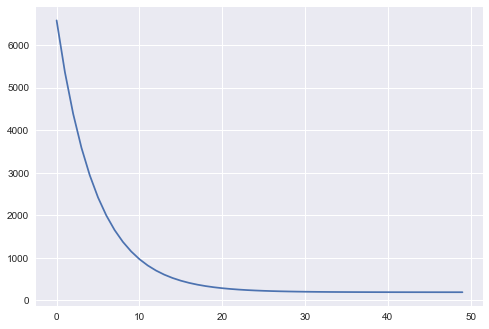

In [48]:
plot.plot(error_list)
plot.show()

In [50]:
y_ = hypothesis(X, theta)
print(y_)


[[-19.47300242]
 [-43.47167405]
 [ 86.04143787]
 ...
 [-20.74353955]
 [137.99079963]
 [-35.69500857]]


No handles with labels found to put in legend.


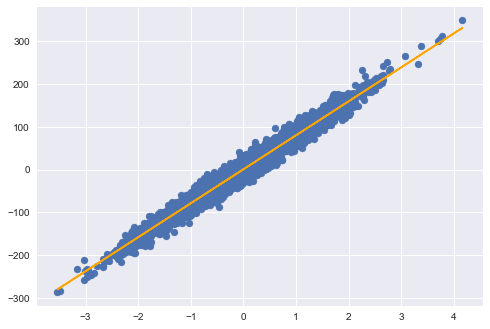

In [56]:
plot.scatter(X,y)
plot.plot(X ,y_ , color = 'orange')
plot.legend()
plot.show()

In [82]:
x_test =  pd.read_csv('./Test Cases (2)/Linear_X_Test.csv').values
y_test1 = pd.read_csv('./Test Cases (2)/sample_submission_linear.csv').values
y_test = hypothesis(x_test , theta)
df = pd.DataFrame(data = y_test , columns = ["y"])
df.to_csv('y_prediction.csv', index = False)
df.head()
print(y_test1)
print(y_test)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[[-148.60481994]
 [ -68.40240978]
 [-200.45377665]
 ...
 [  10.85618805]
 [ -21.42195366]
 [ -53.40934062]]


In [75]:
def r2_score(Y, Y_):
    num = np.sum((Y-Y_)**2)
    denum = np.sum((Y-Y.mean())**2)
    score = 1 - (num/denum)
    return score*100
    


In [83]:
print(r2_score(y,y_))

97.09354314048299


In [91]:
# a = np.array([1,2,3])
# b = np.array([4,5,6,7])

a = np.arange(-1,1,0.2)
b = np.arange(-1,1,0.02)
a,b = np.meshgrid(a,b)
# print(a)
# print(b)



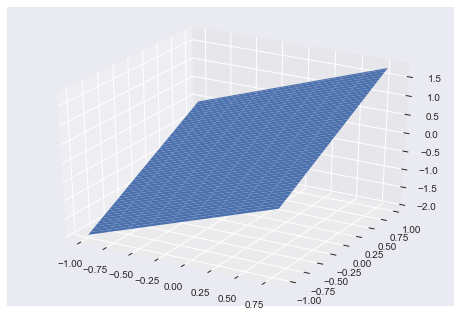

In [94]:
from mpl_toolkits.mplot3d import Axes3D
fig = plot.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(a,b,a+b)
plot.show()

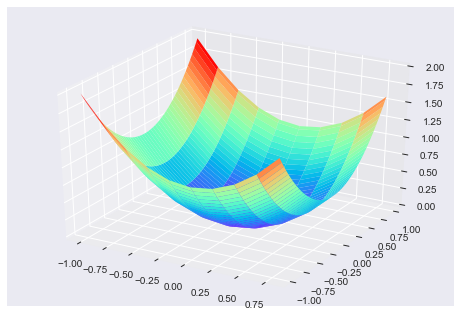

In [98]:
from mpl_toolkits.mplot3d import Axes3D
fig = plot.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(a,b,a**2 + b**2,cmap= 'rainbow')
plot.show()

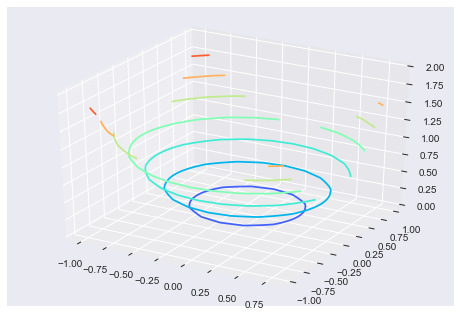

In [99]:
from mpl_toolkits.mplot3d import Axes3D
fig = plot.figure()
axes = fig.gca(projection='3d')
axes.contour(a,b,a**2 + b**2,cmap= 'rainbow')
plot.show()

In [106]:
T0 = np.arange(-50,50,1)
T1 = np.arange(40,120,1)
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)

for i in range (J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T0[i,j] + T1[i,j]*X
        J[i,j] = np.sum((y-y_)**2)
        
print(J.shape)
        



(80, 100)


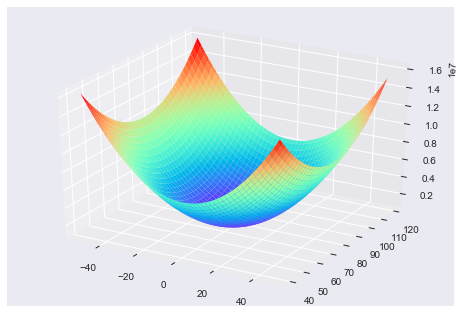

In [107]:
fig = plot.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap= 'rainbow')
plot.show()